Column Description
Main file in this dataset is covid_19_data.csv and the detailed descriptions are below.

covid_19_data.csv

Sno - Serial number
ObservationDate - Date of the observation in MM/DD/YYYY
Province/State - Province or state of the observation (Could be empty when missing)
Country/Region - Country of observation
Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
Confirmed - Cumulative number of confirmed cases till that date
Deaths - Cumulative number of of deaths till that date
Recovered - Cumulative number of recovered cases till that date
2019_ncov_data.csv

This is older file and is not being updated now. Please use the covid_19_data.csv file

Added two new files with individual level information

COVID_open_line_list_data.csv
This file is obtained from this link

COVID19_line_list_data.csv
This files is obtained from this link

Country level datasets
If you are interested in knowing country level data, please refer to the following Kaggle datasets:
India - https://www.kaggle.com/sudalairajkumar/covid19-in-india
South Korea - https://www.kaggle.com/kimjihoo/coronavirusdataset
Italy - https://www.kaggle.com/sudalairajkumar/covid19-in-italy
Brazil - https://www.kaggle.com/unanimad/corona-virus-brazil
USA - https://www.kaggle.com/sudalairajkumar/covid19-in-usa
Switzerland - https://www.kaggle.com/daenuprobst/covid19-cases-switzerland
Indonesia - https://www.kaggle.com/ardisragen/indonesia-coronavirus-cases

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# **Load Files**

In [0]:
!mkdir data
!ls

mkdir: cannot create directory ‘data’: File exists
data  sample_data


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
os.getcwd()

'/content'

In [10]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')


All changes made in this colab session should now be visible in Drive.


In [11]:
from google.colab import files
uploaded = files.upload()

Saving COVID19_open_line_list.csv to COVID19_open_line_list.csv


In [0]:
import io
covid_data = pd.read_csv(io.BytesIO(uploaded['COVID19_open_line_list.csv']))

In [38]:
covid_data['date_admission_hospital'] = pd.to_datetime(covid_data['date_admission_hospital'], errors='coerce', format='%d.%m.%Y')
covid_data['date_confirmation'] = pd.to_datetime(covid_data['date_confirmation'], errors='coerce', format='%d.%m.%Y')
covid_data['date_onset_symptoms'] = pd.to_datetime(covid_data['date_onset_symptoms'], errors='coerce', format='%d.%m.%Y')
covid_data['date_death_or_discharge'] = pd.to_datetime(covid_data['date_death_or_discharge'], errors='coerce', format='%d.%m.%Y')
covid_data.dtypes

ID                                 float64
age                                 object
sex                                 object
city                                object
province                            object
country                             object
wuhan(0)_not_wuhan(1)              float64
latitude                           float64
longitude                          float64
geo_resolution                      object
date_onset_symptoms         datetime64[ns]
date_admission_hospital     datetime64[ns]
date_confirmation           datetime64[ns]
symptoms                            object
lives_in_Wuhan                      object
travel_history_dates                object
travel_history_location             object
reported_market_exposure            object
additional_information              object
chronic_disease_binary             float64
chronic_disease                     object
source                              object
sequence_available                  object
outcome    

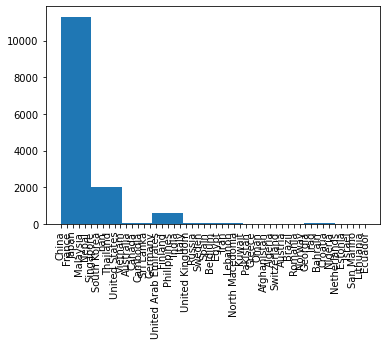

In [63]:
covid_data['country'].head(20)
plt.hist(covid_data.country.astype(str))
plt.xticks(rotation='vertical')
plt.show()


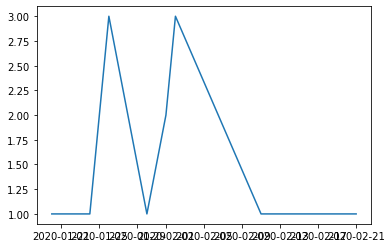

In [53]:
from matplotlib import pyplot as plt
covid_data['country'].unique()

us_admit_dates = covid_data[covid_data['country'] == 'United States']['date_admission_hospital'].unique()
us_admit_dates.sort()
admissions = []
for d in us_admit_dates:
  us = covid_data[covid_data['country'] == 'United States']
  daily_admit = len(us[us['date_admission_hospital'] == d])
  admissions.append(daily_admit)
admissions
plt.plot(us_admit_dates, admissions)
plt.show()